# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 5. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**


* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 35 баллов за контест и 5 баллов за ноутбук
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 40 баллов

In [1]:
# Bot check

# HW_ID: fpmi_ad5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import scipy.stats as sps

coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики, которые при необходимости можно доработать.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Закомментируйте строку ниже для запуска локально
#from coin import coin, uniform_pdf, norm_pdf, expon_pdf

#### Напишем генерацию равномерного распределения:

In [4]:
def uniform(size, precision=30):
    if not isinstance(size, tuple):
        size = (size,)
    RandBits = coin((*size, precision))
    TwoDegArr = 2 ** np.triu(np.ones(precision, dtype=int)).sum(axis=0)
    return (RandBits / TwoDegArr).sum(axis=-1)

##### функция построения гистрограммы и графика плотности

In [5]:
def plot_uniform_density(size=200):
    plt.figure(figsize=(20, 10))
    grid = np.linspace(-0.25, 1.25, 500)
    sample = np.random.uniform(size=size)
    plt.scatter(x=sample, y=np.zeros(size), alpha=0.4)
    plt.hist(sample, bins=50, density=True, alpha=0.4, label="Гистограмма выборки")
    plt.plot(
        grid, 
        uniform_pdf(grid), 
        color="red", 
        lw=5, 
        label="Плотность случайной величины"
    )
    plt.title(r"Случайная величина $\xi \sim \mathcal{U}$[0,1]", fontsize=29)
    plt.legend(fontsize=14, loc=1)
    plt.xlim(-0.25, 1.25)
    return plt.gcf()

##### Применим эту фнкцию

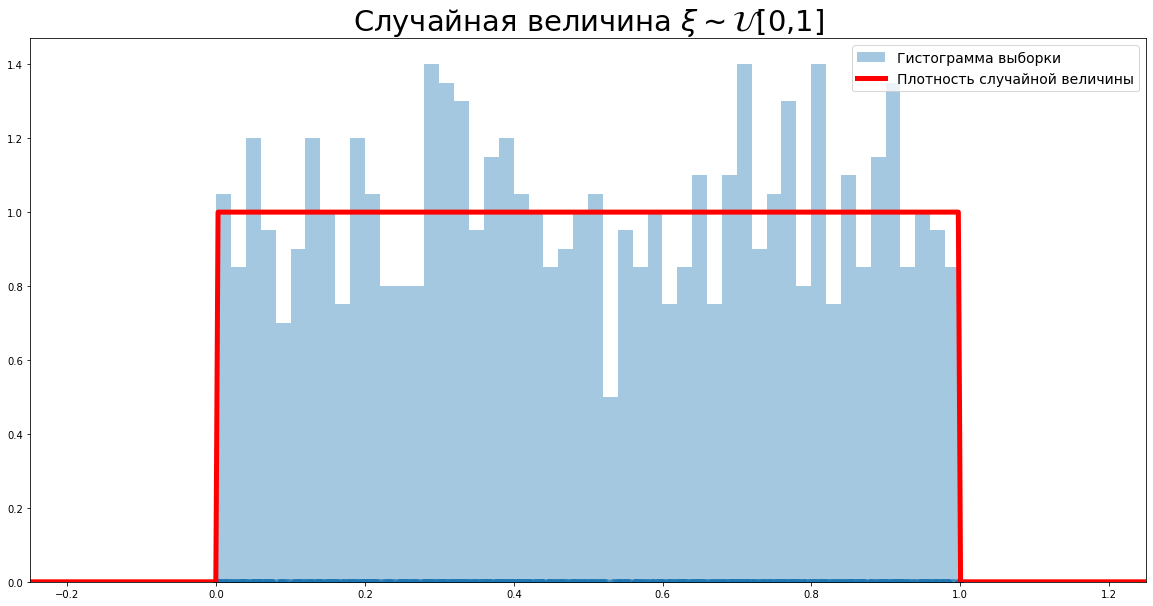

In [6]:
q = plot_uniform_density(1000)

##### Выводы из графика:  
- Бины находятся достаточно близко около прямой плотности, что скорее всего означает что функция uniform написана верно  

Рассмотрим как ведут себя величины, в зависимости от precision

In [7]:
def plot_uniform_different_precision(size=100):
    # определите график размера 15 на 3
    plt.figure(figsize=(30, 15))
    plt.gcf().tight_layout(pad=100)

    for i, precision in enumerate([1, 2, 3, 5, 7, 10, 15, 30]):
        plt.subplot(5, 2, i + 1)
        sample = uniform(size=size, precision=precision)
        plt.scatter(sample, np.zeros(size), alpha=0.4, lw=4)
        plt.title(r"Precision:" + str(precision))

        plt.yticks([])
        if i < 6:
            plt.xticks([])

    plt.suptitle("Влияние precision на случайные величины", fontsize=22)
    return plt.gcf()

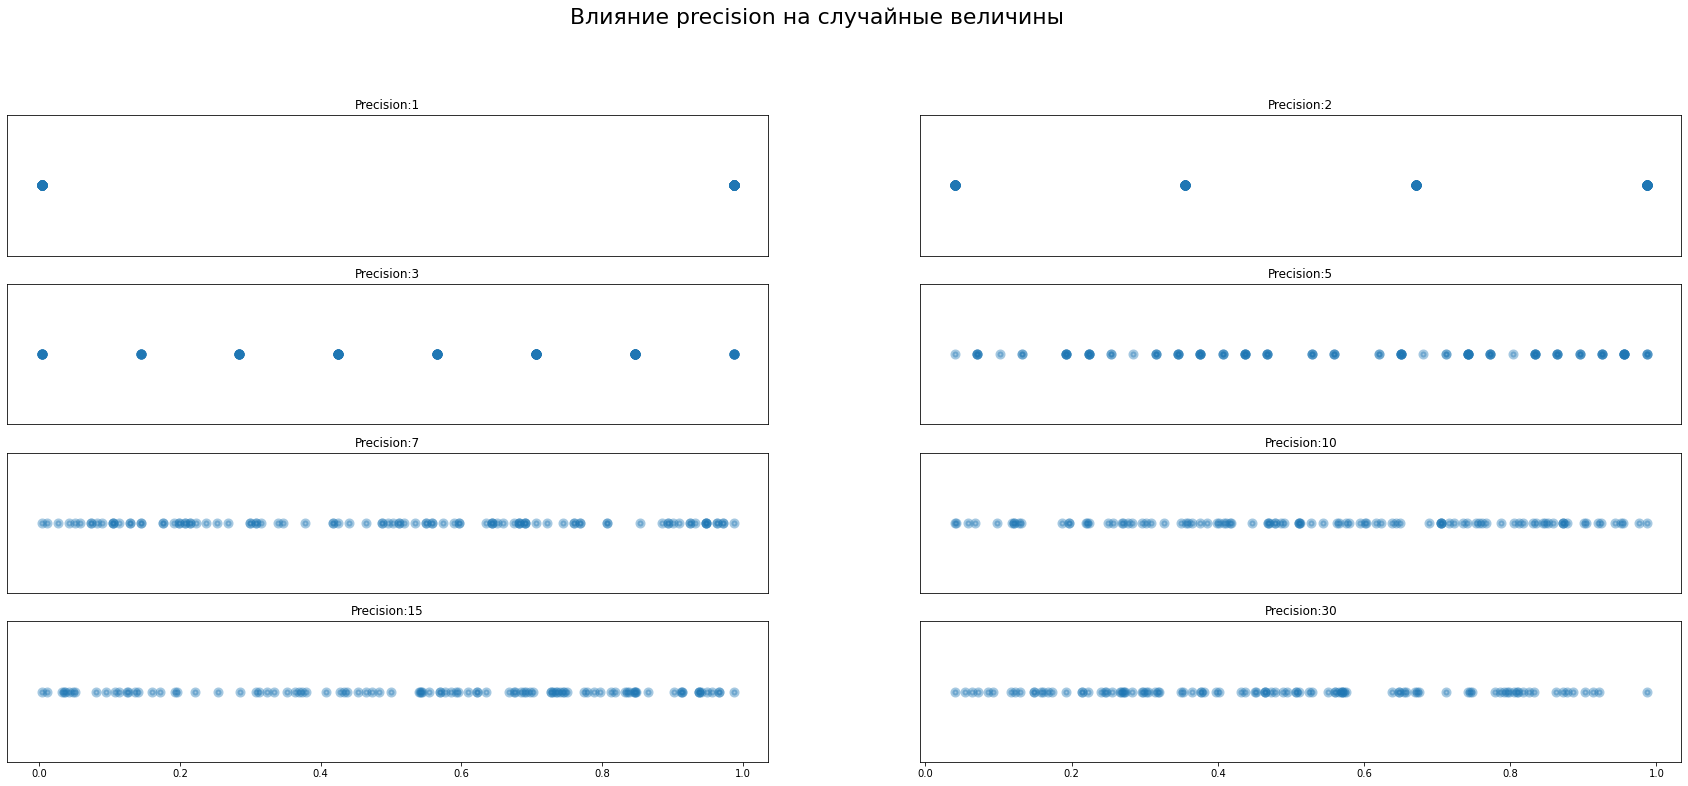

In [8]:
q = plot_uniform_different_precision()

##### Выводы из графика:  
1) precision - достаточно важный параметр при малых значениях   
2) При установке больше 7 разницы в целом не видно что не удивительно  

Преобразование Бокса-Мюллера

In [9]:
def normal(size=1, loc=0, scale=1, precision=30):
    xi1 = uniform(size, precision)
    xi2 = uniform(size, precision)
    return loc + scale * np.cos(2 * np.pi * xi1) * np.sqrt(-2 * np.log(xi2))

Строим график зависимости нормальной СВ и на этом же графике плостность

In [10]:
def plot_normal_density(size=200):
    plt.figure(figsize=(20, 10))
    grid = np.linspace(-3, 3, 500)
    sample = normal(size=size)
    plt.scatter(x=sample, y=np.zeros(size), alpha=0.4)
    plt.hist(sample, bins=40, density=True, alpha=0.4, label="Гистограмма выборки")
    plt.plot(
        grid, norm_pdf(grid), color="red", lw=5, label="Плотность случайной величины"
    )
    plt.title(r"Случайная величина $\xi \sim \mathcal{N}$[0,1]", fontsize=29)
    plt.legend(fontsize=14, loc=1)
    plt.xlim(-4, 4)
    return plt.gcf()


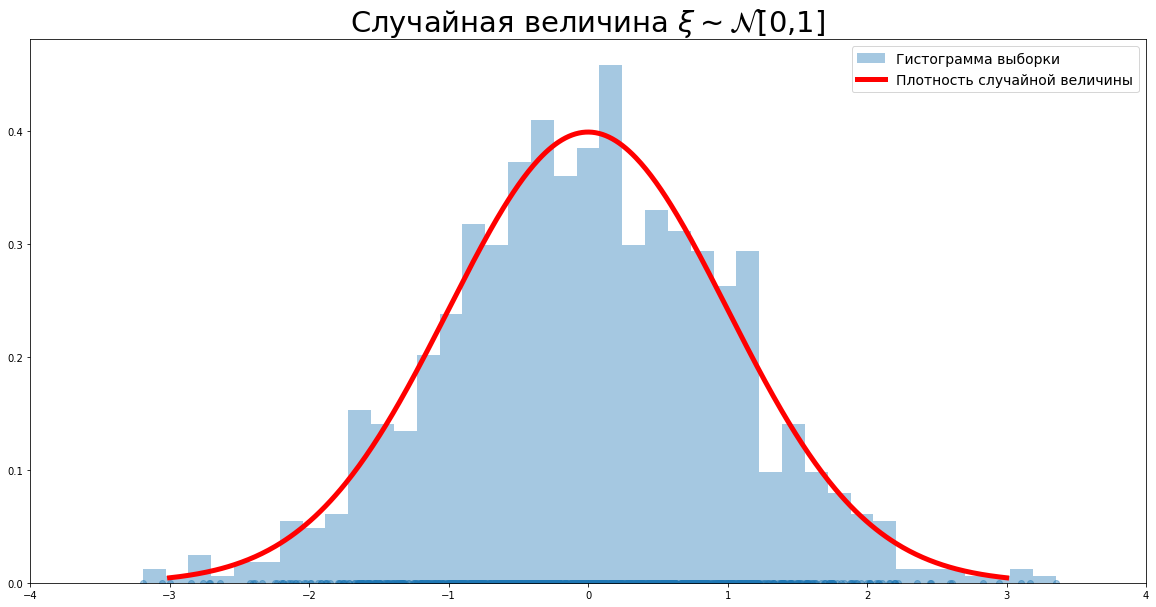

In [11]:
q = plot_normal_density(1000)

##### Вывод из графика:
- По видному соответствию плотности гистрограммы можно понять, что реализация и в целом справедливость преобразования Бокса-Мюллера верны  

Рассмотрим задачу:
Если ξ — случайная величина, имеющая абсолютно непрерывное распределение, и F — ее функция распределения, то случайная величина F(ξ) имеет равномерное распределение на [0,1].  
Док-во: Ф-я распределения $F(x) := \mathcal{P}(\xi \leqslant x) \Rightarrow \mathcal{F}_{\mathcal{F(\xi)}}(x) = \mathcal{P}(\mathcal{F}(\mathcal(\xi) \leqslant x) = \mathcal{P}(\xi \leqslant \mathcal{F}^{-1}(x)) = \mathcal{F}(\mathcal{F}^{-1}(x)) = x$   
$\exists \mathcal{F}^{-1}$ так как $\mathcal{F}$ монотонна и непрерывна справа  
Так как $\mathcal{F}_{\mathcal{F}(\xi)}(x) = x$ то СВ $\sim U([0, 1])$ ч.т.д.

Теперь применим:  
Пусть $\xi \sim $ любое абсолютно непрерывное распределение  
Пусть функция рспределения у нее $\mathcal{F}$  
Пусть $X \sim U[0, 1]$  
Тогда как доказано ранее у $\mathcal{F}(\xi)$ и у $X$ распределения совпадают    
тогда $\xi' = \mathcal{F}^{-1}(X)$ - имеет то же распределение, что и $\xi$   
Действительно $\mathcal{P}(\mathcal{F}^{-1}(X) \leqslant x) = \mathcal{P}(X \leqslant \mathcal{F}(x)) = \mathcal{F}_X(\mathcal{F}(x)) = \mathcal{F}(x)$ тогда у $\xi$ и у $\xi'$ совпадают функции распределения ч.т.д.




Применим $\mathcal{F}^{-1}$ к СВ $\sim U[0, 1]$ и получим СВ $\sim Exp(1)$ где:  
$\mathcal{F}(x) = 1 - \mathcal{e}^{-\lambda x}$  а значит  
$\mathcal{F}^{-1}(x) = \frac{\ln(1-x)}{-\lambda}$

In [12]:
def expon(size=1, lambd=1, precision=30):
    sample = uniform(size=size, precision=precision)
    return -np.log(1 - sample) / lambd

Построим график плотности и гистрограмму по нашему распределению

In [13]:
def plot_expon_density(size=100):
    plt.figure(figsize=(20, 10))
    grid = np.linspace(-0.5, 5, 500)
    sample = expon(size=size)
    plt.scatter(x=sample, y=np.zeros(size), alpha=0.4)
    plt.hist(sample, bins=40, density=True, alpha=0.4, label="Гистограмма выборки")
    plt.plot(
        grid, expon_pdf(grid), color="red", lw=5, label="Плотность случайной величины"
    )
    plt.title(r"Случайная величина $\xi \sim Exp(\lambda)$", fontsize=29)
    plt.legend(fontsize=14, loc=1)
    plt.xlim(-0.5, 5)
    return plt.gcf()

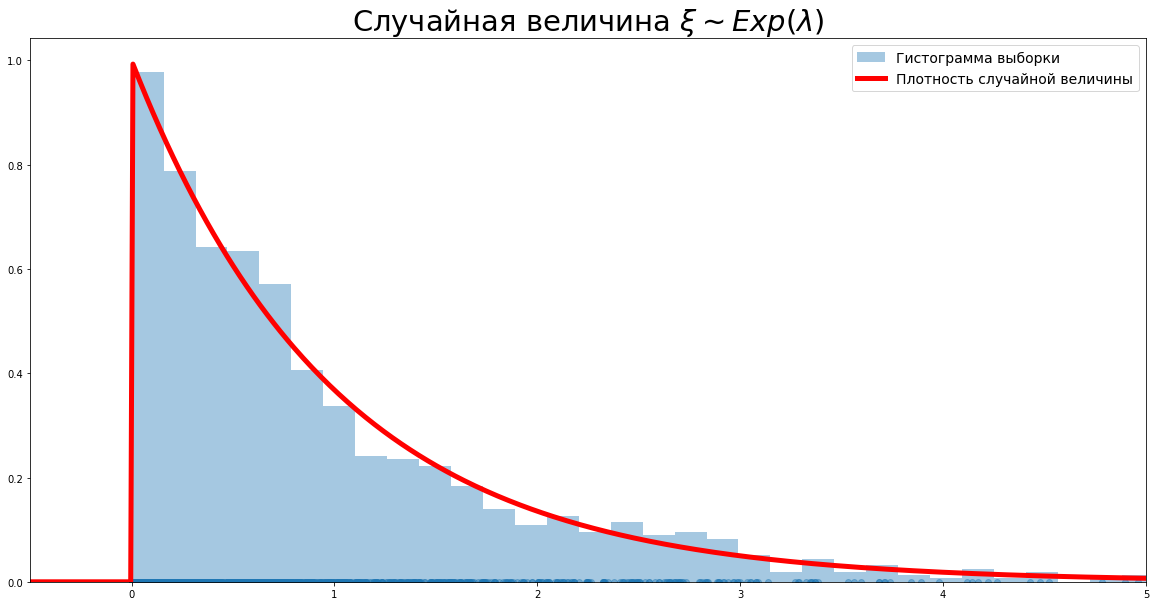

In [14]:
q = plot_expon_density(1000)

##### Вывод:  
- Техника предложенная автором (использование $X \sim U[0,1]$ и $\mathcal{F}^{-1}$) действительно могут дать любое абсолютно непрерывное распределение(проверено толь Exp) 

**Выводы:**
- Имея только монетку можно создавать любое абсолютно непрерывное распределение у которого можно явно найти обратную к функции распределения
- precision - важный при малых значения и не столь важен при больших

...

---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

In [15]:
import seaborn as sns

sns.set(font_scale=1.6, palette='summer')

Строим плотности распределения коши и Нормального на одном графике

In [16]:
def plot_normal_density(size=200):
    plt.figure(figsize=(20, 10))
    grid = np.linspace(-6, 6, 500)
    plt.plot(
        grid,
        norm_pdf(grid),
        color="red",
        lw=5,
        label="Плотность нормального распределения",
    )
    plt.plot(
        grid,
        sps.cauchy().pdf(grid),
        color="blue",
        lw=5,
        label=r"Плостность распределения Коши",
    )
    plt.title(r"Сравнение плотностей Нормальное и Коши", fontsize=29)
    plt.legend(fontsize=14, loc=1)
    plt.xlim(-6, 6)
    return plt.gcf()

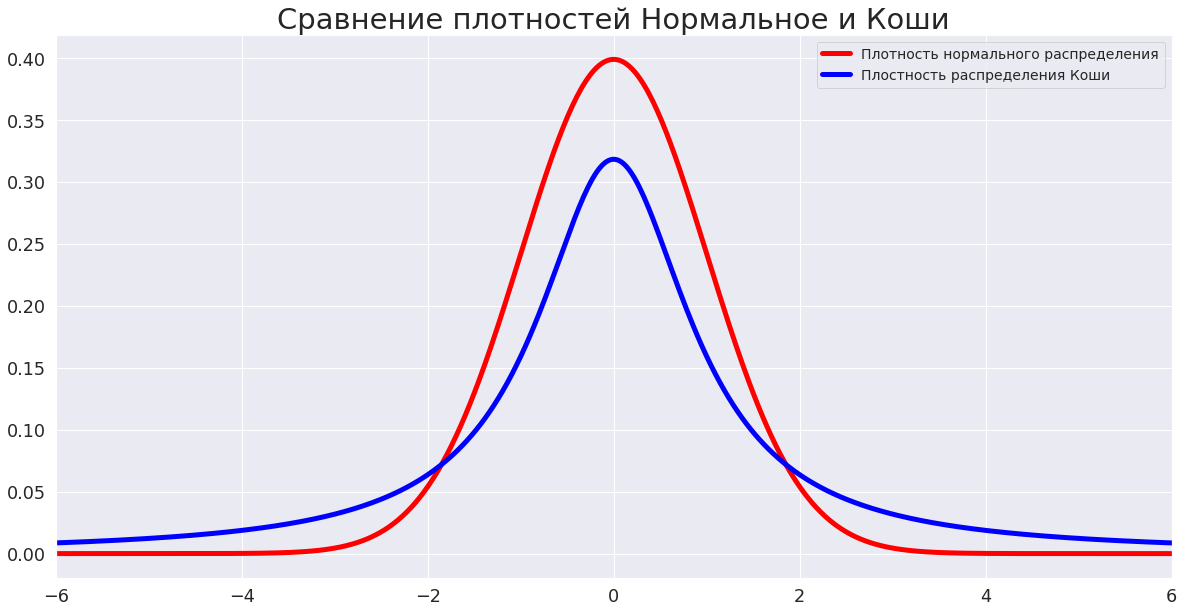

In [17]:
q = plot_normal_density()

##### Вывод из графика: 
- Действительно распределение Коши и Нормальное очень похожи
- тяжелые хвосты из условия можно увидеть на графике

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

Проведем 10 независимых испытаний, в кажом их которых посчитаем $count\_means[i] := $ среднее среди первых i элементов в выборке  
и построим график $count\_means$  
Начинать будем немного отступив, чтобы не портить график выбросами  

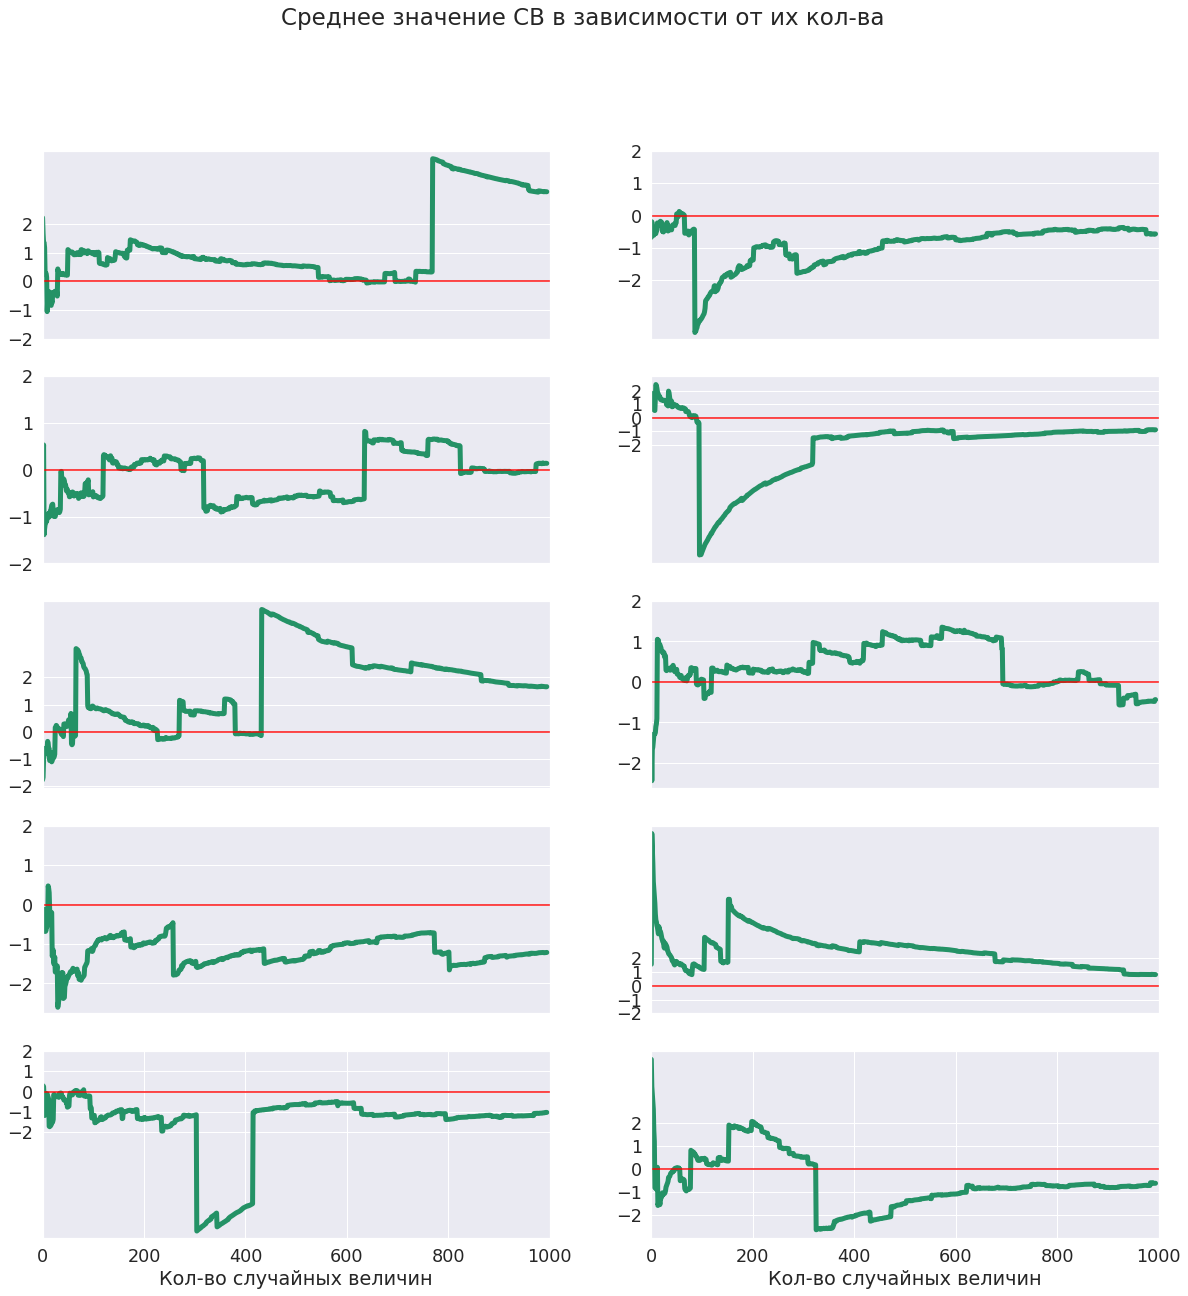

In [18]:
plt.figure(figsize=(20, 20))
size = 1000  # количество случайных величин


for i in range(10):
    plt.subplot(5, 2, i + 1)
    samples = sps.cauchy().rvs(size=size)
    cum_means = samples.cumsum() / (np.arange(size) + 1)
    plt.plot(cum_means[5:], lw=5)
    plt.hlines(0, 0, size, alpha=0.7, color="red", lw=2)
    plt.yticks([-2, -1, 0, 1, 2])

    if i >= 8:
        plt.xlabel("Кол-во случайных величин")
    if i < 8:
        plt.xticks([])
    plt.xlim((0, size))
plt.suptitle("Среднее значение СВ в зависимости от их кол-ва")
plt.show()

##### Вывод:
- Видно что предела почти всегда нету  
- Все графики очень разные и вообще говоря непонятен их характер

Теперь проведем огромную серию таких экспериментов и отобразим на одном графике с разными границами по Oy

In [19]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок

samples = sps.cauchy().rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

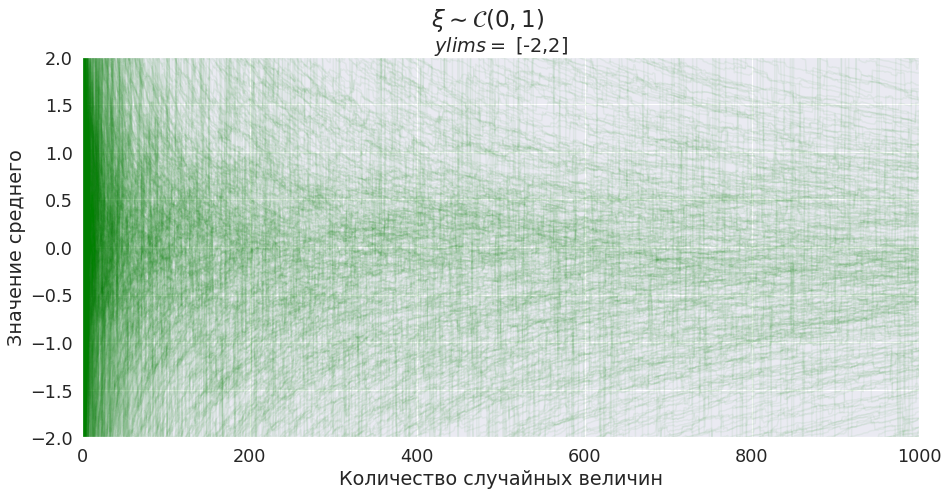

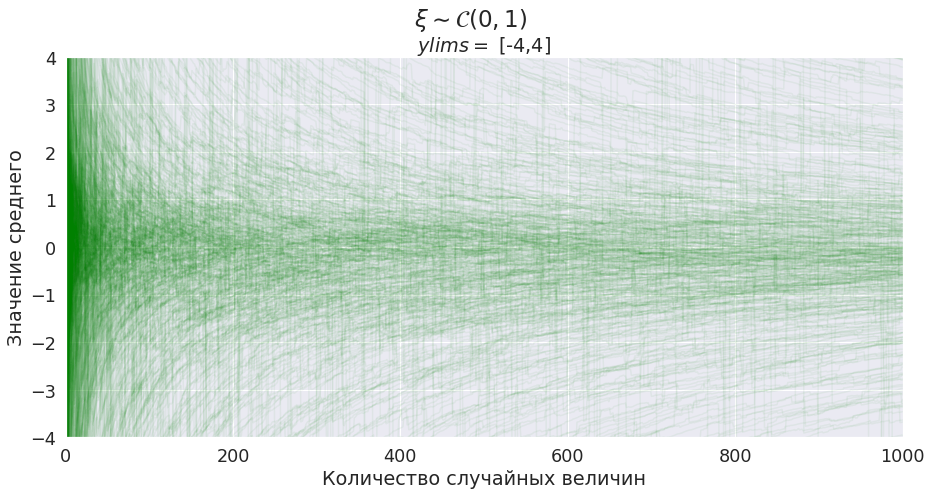

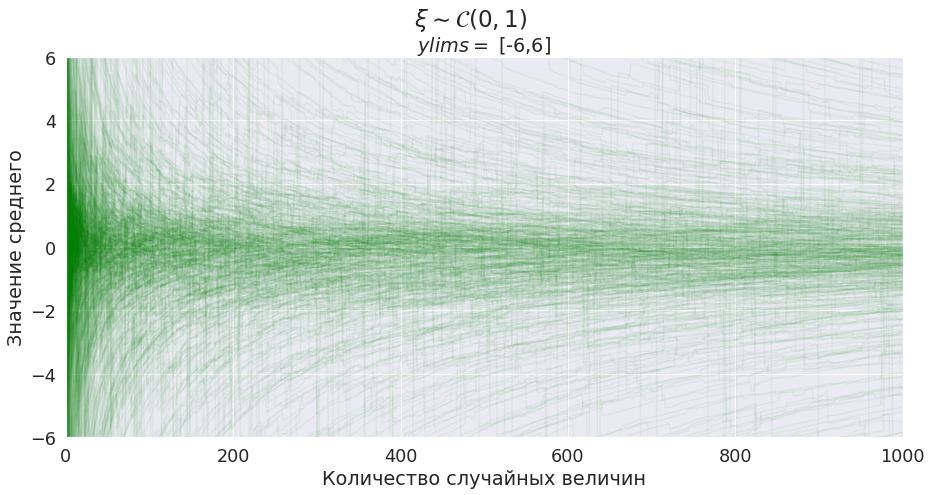

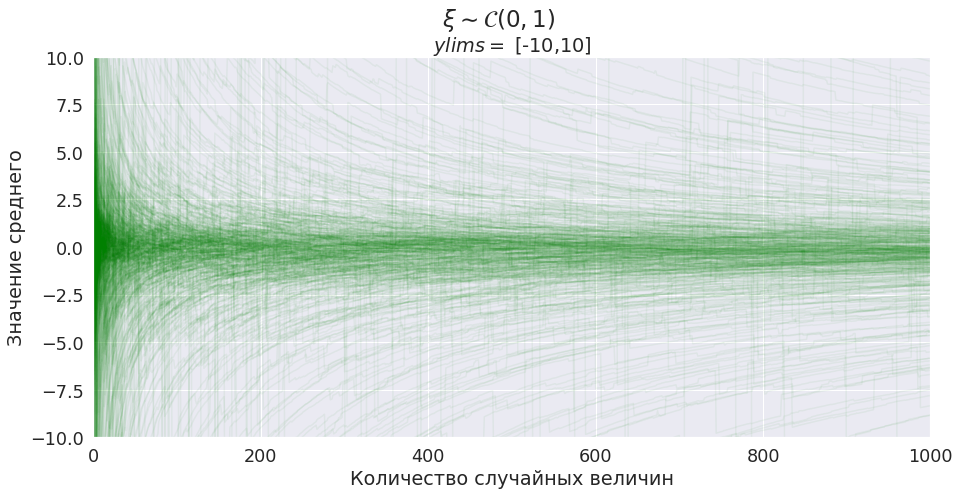

In [20]:
for ylim_bound in (2, 4, 6, 10):
    plt.figure(figsize=(15, 7))

    # рисуем для каждой выборки отдельно
    for i in range(samples_count):
        plt.plot(np.arange(size) + 1, cum_means[i], color="green", alpha=0.05)

    plt.xlabel("Количество случайных величин")
    plt.ylabel("Значение среднего")
    plt.xlim((0, size))
    plt.ylim((-ylim_bound, ylim_bound))
    plt.suptitle(r"$ \xi \sim \mathcal{C}(0, 1)$")
    plt.title(r"$ylims = $ [" + str(-ylim_bound) + "," + str(ylim_bound) + "]")
plt.show()

##### Вывод: 
- По сравнению например с тем же подходом у экспоненциального распределения этот "столб" слишком широкий, а значит что это распределение сильно отличается от нормального, несмотря на то что визуально похожи  
- Последний способ мало эффективен для распределения Коши
- Говорить о ЗБЧ для распределения Коши странно, т.к. оно не имеет матожа, но точно ясно что предела у среднего нету  

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

Напишем функцию, считающую комулятивные медианы

In [21]:
def cum_medians(arr: np.ndarray):
    return np.array([np.median(arr[: i + 1]) for i in range(len(arr))])

Проведем 10 независимых испытаний, в кажом их которых посчитаем $cumulative\_medians[i] := $ медиана среди первых i элементов в выборке  
и построим график $cumulative\_medians$  
Начинать будем немного оступив, чтобы не портить график выбросами  

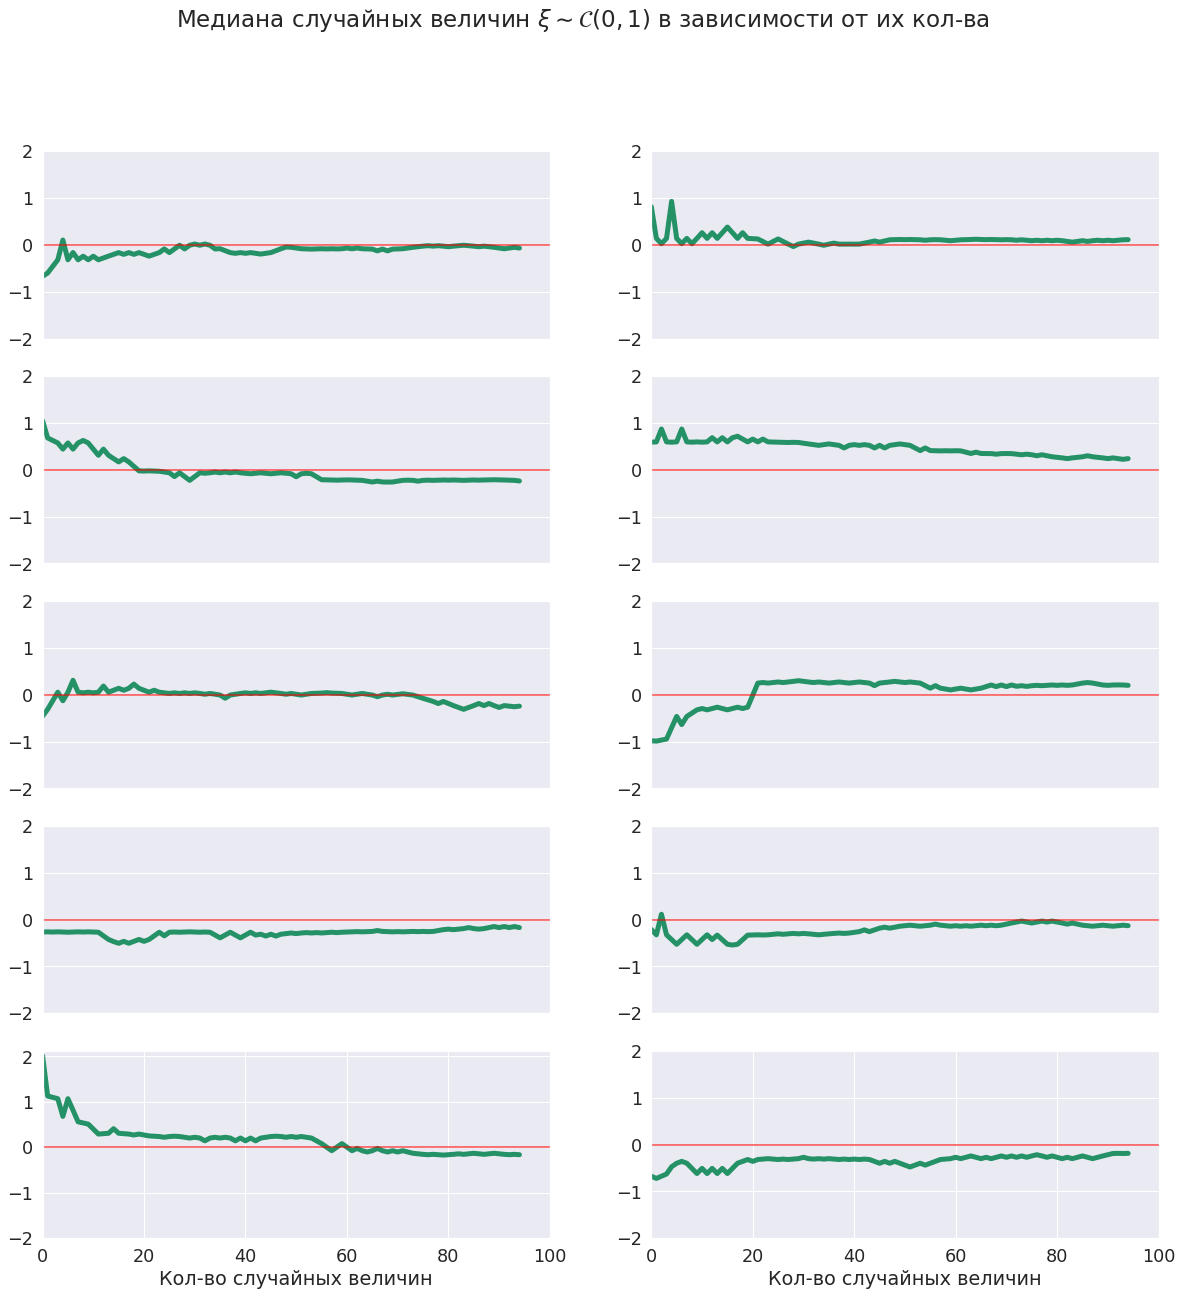

In [22]:
plt.figure(figsize=(20, 20))
size = 100  # количество случайных величин


for i in range(10):
    plt.subplot(5, 2, i + 1)
    samples = sps.cauchy().rvs(size=size)
    cumulative_medians = cum_medians(samples)
    plt.plot(cumulative_medians[5:], lw=5)
    plt.hlines(0, 0, size, alpha=0.7, color="red")
    plt.yticks([-2, -1, 0, 1, 2])

    if i >= 8:
        plt.xlabel("Кол-во случайных величин")
    if i < 8:
        plt.xticks([])
    plt.xlim((0, size))
plt.suptitle(
    r"Медиана случайных величин $\xi \sim \mathcal{C}(0, 1)$ в зависимости от их кол-ва"
)
plt.show()

##### Выводы:
- Легко видеть что графики приближаются к 0 а значит предел вероятно есть (в нуле)

##### Анализировать будем распределение Коши но вместе построим и нормальное для сравнения

Генерируем выборки и комулятивные медианы

In [23]:
size = 1000  # количество случайных величин
samples_count = 1000  # количество выборок

samples_cauchy = sps.cauchy().rvs(size=(samples_count, size))
cum_cauchy_medians = np.array([cum_medians(sample) for sample in samples_cauchy])

samples_norm = sps.norm().rvs(size=(samples_count, size))
cum_norm_medians = np.array([cum_medians(sample) for sample in samples_norm])

Эта функция будет рисовать все выборки переданные на одном графике 

In [24]:
def draw_samples(arrs):
    size = len(arrs[0])
    plt.figure(figsize=(14, 5))
    # рисуем для каждой выборки отдельно
    for arr in arrs:
        plt.plot(np.arange(size) + 1, arr, color="green", alpha=0.01)
    plt.xlabel("Количество случайных величин")
    plt.ylabel("Значение медианы")
    plt.xlim((0, size))
    plt.ylim((-0.4, 0.4))

Нарисуем графики Медианы СВ для распределений

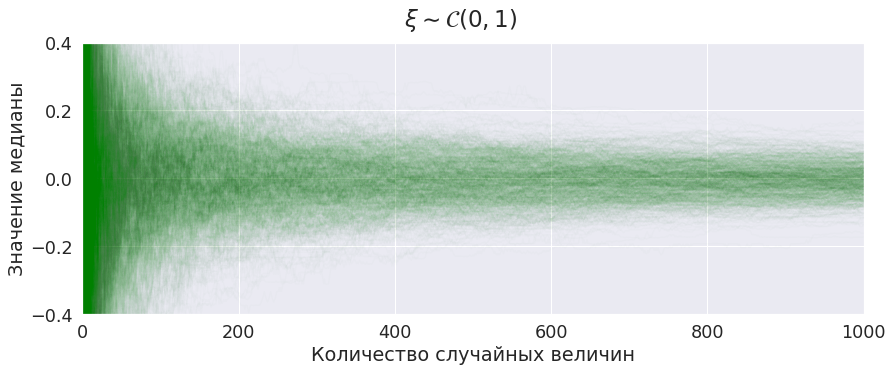

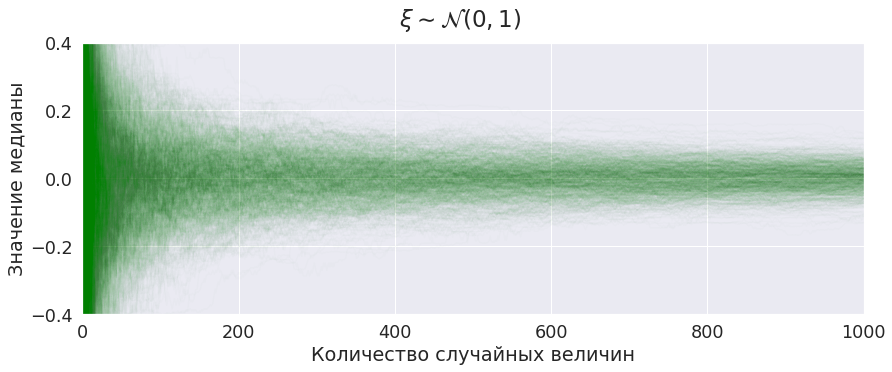

In [25]:
draw_samples(cum_cauchy_medians)
plt.suptitle(r'$ \xi \sim \mathcal{C}(0, 1)$')
plt.show()
draw_samples(cum_norm_medians)
plt.suptitle(r'$ \xi \sim \mathcal{N}(0, 1)$')
plt.show()

##### Вывод из графика:
1) Теперь "столбы" у распределений очень похожи  
2) В распределении Коши он все же шире, чем у нормального, это говорит о том, что медианы стремятся к нулю медленнее, чем у нормального

**Вывод:**
1) Нормальное распределение и распределение Коши внешне похожи  
2) Несмотря на 1 пункт распределение Коши сильно уступает нормальному хотя бы т.к.выборочные средние у нормального имеют предел в отличии от Коши  
3) "Выборочные медианы" у распределения Коши сходятся к 0  

...

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

Задаем параметры

In [26]:
a = 0.5
K = 500

Вычисляем $F(n)$ для всех $n \in \{1, ...., 5000\}$

In [27]:
def generate_deveation_arr(n = 5000):
    samples = sps.bernoulli(a).rvs((K, n))
    cum_means = np.cumsum(samples, axis = 1) / (np.arange(1, n+1))
    return (abs(cum_means - a)).mean(axis = 0)

Делаем выборку n от 1 до 5000 - такая болшя понадобиться для графика

In [28]:
deveations = generate_deveation_arr(5000)

In [29]:
print(min(np.where(deveations <= 0.02)[0]))

411


In [30]:
n_arange = np.arange(1, 5001)

Найдем $min\{n : {{F}}(n) \leqslant 0.02\}$

Теперь построим график зависимости $F(n)$ от $n$

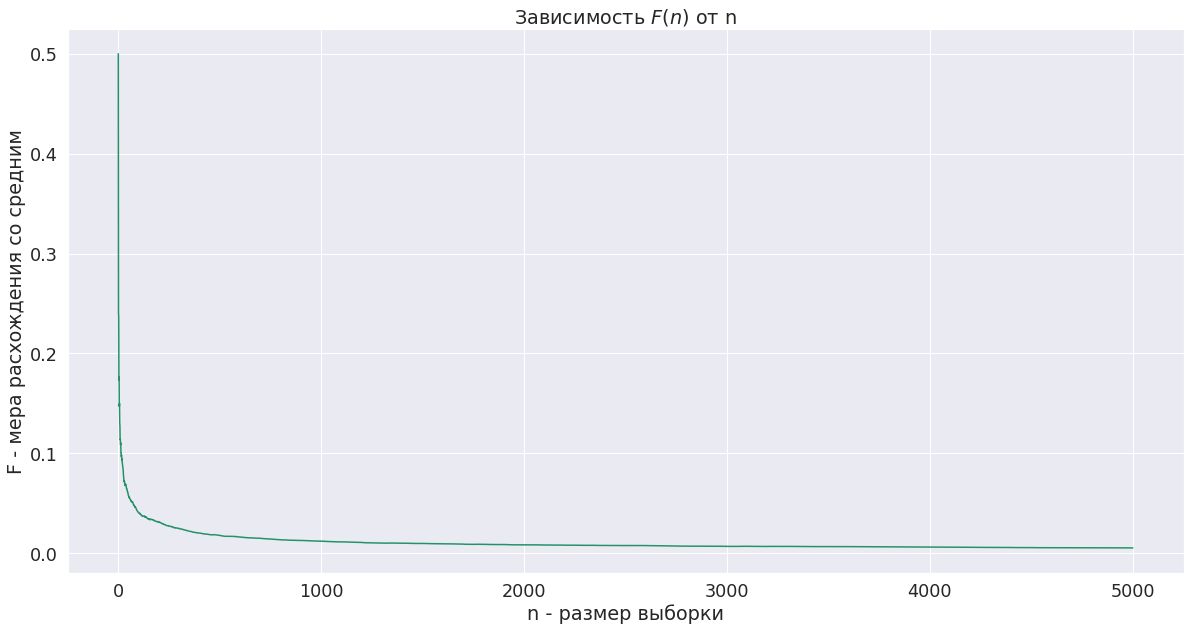

In [31]:
import matplotlib.ticker as mticker


def update_ticks(x, pos):
    x = round(x, 3)
    return f"$10^{{{x}}}$"


fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(n_arange, deveations)
plt.title("Зависимость $F(n)$ от n")
plt.xlabel("n - размер выборки")
plt.ylabel("F - мера расхождения со средним")
plt.show()

Напишем функцию строющую график $(F(log(x)))$ от $n$ начиная с n = begin  

In [32]:
def draw_logF(x: np.ndarray, y: np.ndarray, begin=0):
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.plot(np.log10(x[begin:]), y[begin:], lw = 2)
    ax.set_title("Зависимость $F(n)$ от n")
    ax.set_xlabel("n - размер выборки (logscale)")
    ax.set_ylabel(r"F - мера расхождения со средним")
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(update_ticks))
    plt.show()

Построим полный график $(F(log(x)))$ т.е. x в логарифмической шкале

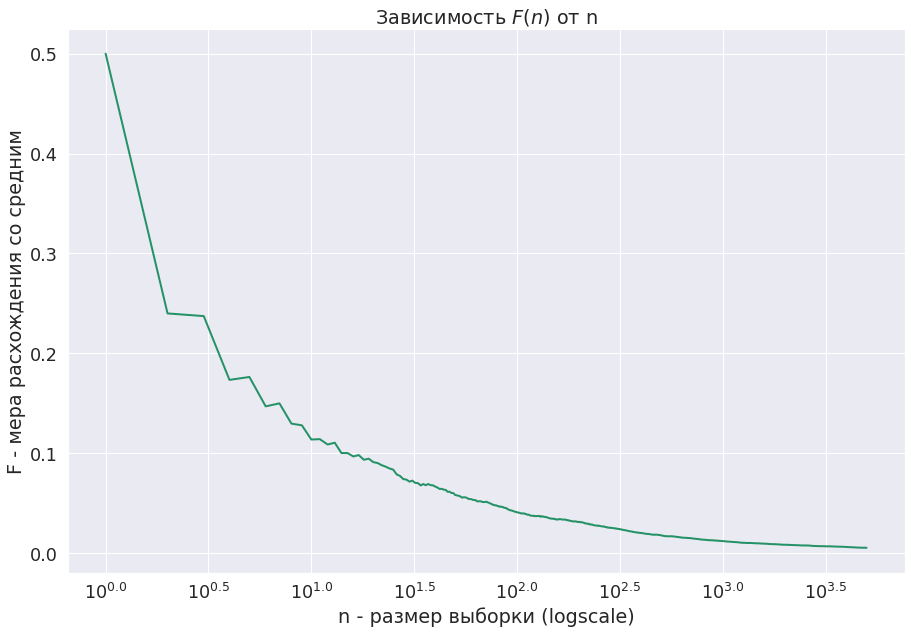

In [33]:
draw_logF(n_arange, deveations)

Построим такой же график но начиная с $n = 100$

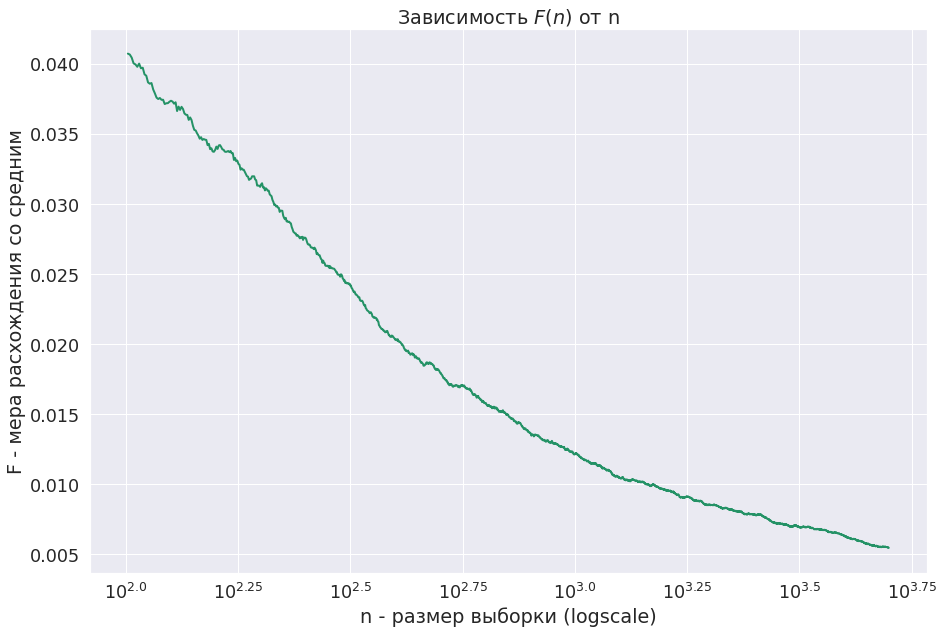

In [34]:
draw_logF(n_arange, deveations, 100)

Построим такой же график но начиная с $n = 500$

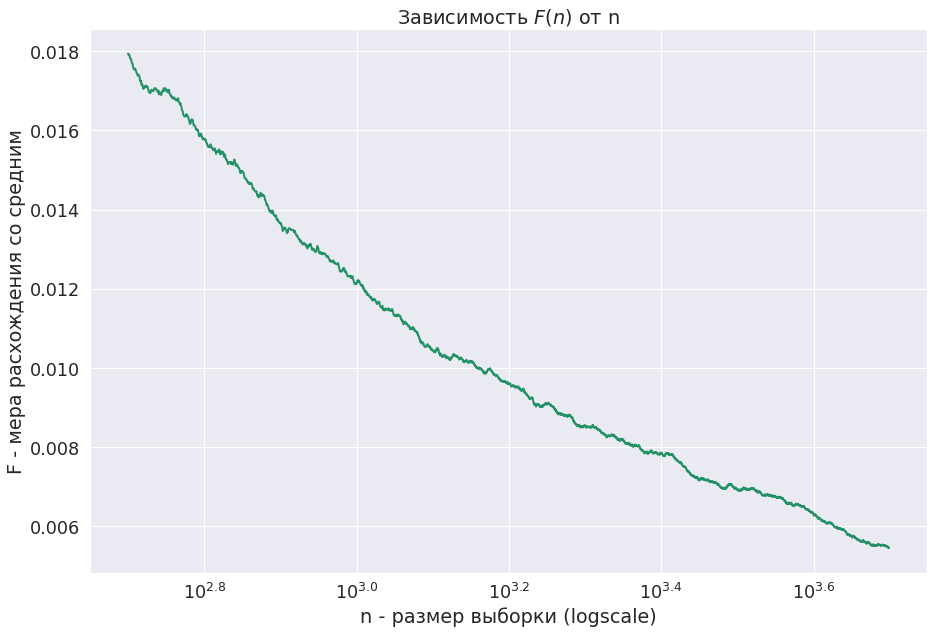

In [35]:
draw_logF(n_arange, deveations, 500)

Построим такой же график но начиная с $n = 1000$

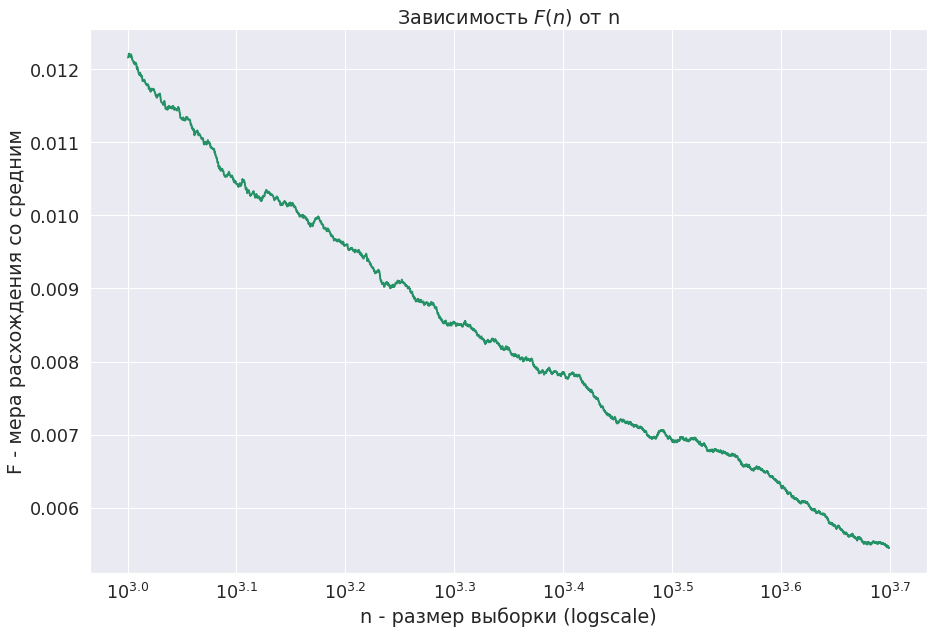

In [36]:
draw_logF(n_arange, deveations, 1000)

Теперь построим тот же график в loglog scale

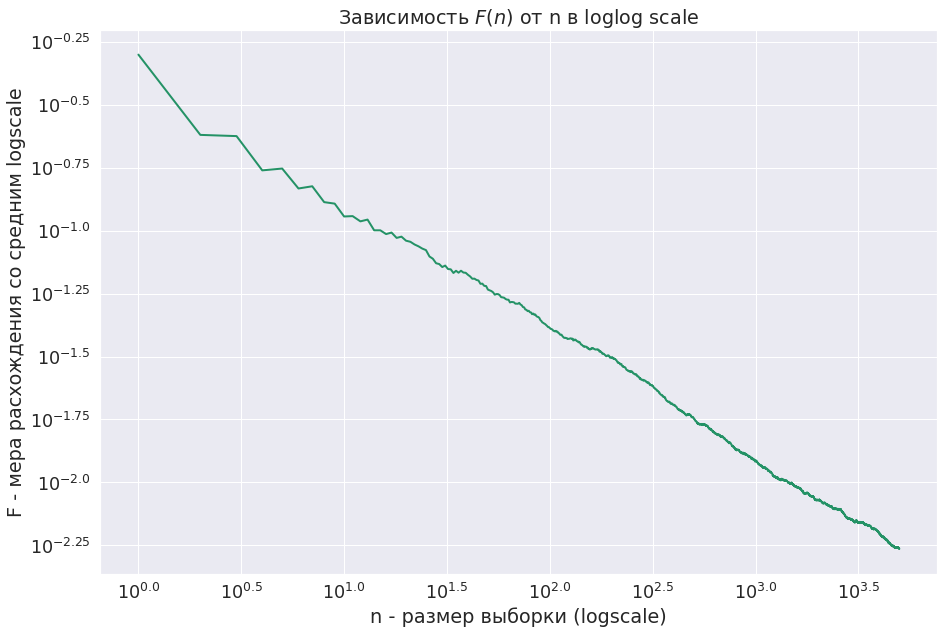

In [37]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(np.log10(n_arange), np.log10(deveations), lw = 2)
ax.set_title("Зависимость $F(n)$ от n в loglog scale")
ax.set_xlabel("n - размер выборки (logscale)")
ax.set_ylabel(r"F - мера расхождения со средним logscale")
ax.xaxis.set_major_formatter(mticker.FuncFormatter(update_ticks))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(update_ticks))
plt.show()

На этом графике видна линия $a - bx$ - если считать, что действительно линейно, то:  
$log_{10}(F(n)) = a - blog_{10}(x) \Rightarrow F(n) = cx^{-d},$ где c, d > 0

##### Вывод из графиков:
1) $F$ заметно убывает в начале при росте n(даже на лагорифмической шкале)  
2) $F$ с ростом n убывает все медленнее  
3) Можно сказать что функция $F(n) = cx^{-d}$, c, d > 0, для некоторых c,d 

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

Для каждого a находим необходимое значение

При вычисление необходимого значения для каждого a проведем 50 экспериментов и возьмем среднее

In [38]:
ans = []
num_of_experiments = 50
experiments_values = []
for a in np.arange(0.05, 1, step=0.05):
    experiments_values = []
    for i in range(num_of_experiments):
        arr_of_deveation = generate_deveation_arr(1000)
        experiments_values.append(min(np.where(arr_of_deveation < 0.02)[0]))
    ans.append(np.mean(experiments_values))
ans = np.array(ans)
a = 0.5

n_arange = np.arange(1, 5001)

Строим график a от необходимого n

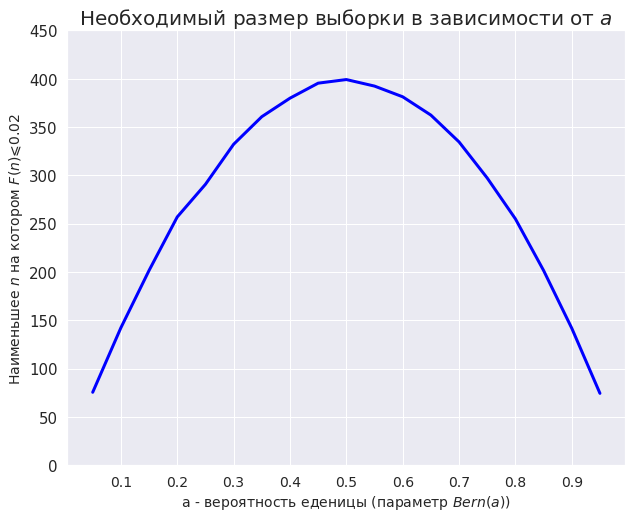

In [39]:
plt.figure(figsize=(10, 8))
plt.plot(np.arange(0.05, 1, step=0.05), ans, lw=3, c="blue")
plt.ylim(0, 450)
plt.xticks(np.arange(0.1, 1, step=0.1), fontsize=14)
plt.yticks(np.arange(0, 500, step=50), fontsize=15)
plt.xlabel(r"a - вероятность еденицы (параметр $Bern(a)$)", fontsize=14)
plt.ylabel(r"Наименьшее $n$ на котором $F(n) \leqslant 0.02$", fontsize=14)
plt.title(r"Необходимый размер выборки в зависимости от $a$", fontsize=20)
plt.show()

##### Вывод из графика: 
1) Число элементов в необходимой выборке сильно зависит от параметра a  
2) Самое большое значение $\sim 400$ у параметра 0.5(по крайней мере по тенденции, ясно что именно 0.5 и будет)  
3) Ясно виден рост от 0 до 0.5 и падение от 0.5 к 1

**Выводы:**  
1) Обычная монетка требует самое большое кол-во данных выборке(среди Бернулиевских с другими параметрами)  
2) Размер выборки существенно зависит от параметра a в $Bern(a)$  
3) При росте выборки выбранная нами $F$ заметно падает в начале, а потом (после некоторого значения, которое в частности для a = 0.5 находится между 100 и 500) довольно медленно